Last modified: Sept 2nd, 2025

# Oblique QLT 

#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [26]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.testoblique import dydt, get_omega_vec

In [28]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

### Oblique electrostatic waves initialization (around $t\approx 700\Omega_{ce}^{-1}$)

In [29]:
# parameters from 2021 paper 

# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
k_0 = 1 # 1/d_e
omega_pe = 4 # Omgea_ce

n_c = 0.8 # n_e

# thermal velocity 
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 1e-11

K_perp_0 = ((alpha_c_perp**2) / 2) * n_c
K_par_0 = ((alpha_c_par**2) / 2) * n_c
T_perp_0 = ((alpha_c_perp**2) / 2) 
T_par_0 = ((alpha_c_par**2) / 2) 

dB0 = 4e-4 # (v_0**2) * 4 * np.pi * (k_0**2)/(omega_0**2) * ((omega_0 - 1)**2) # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

# max time 
t_max = 600 # Omega_ce

In [30]:
# k discretization 
k_perp_ = np.linspace(8, 45, 50)
k_par_ = np.sqrt((omega_0**2) / (1-omega_0**2))*k_perp_
k_abs = np.sqrt(k_perp_**2 + k_par_**2)

In [31]:
dk_perp = np.abs(k_perp_[1] - k_perp_[0])
dk_par = np.abs(k_par_[1] - k_par_[0])
dk_abs = np.abs(k_abs[1] - k_abs[0])

In [32]:
# solve initial dispersion relation at t=0
sol_ = get_omega_vec(k_perp=k_perp_, k_par=k_par_, omega_pe=omega_pe, omega_pi=omega_pi, 
                     v_0=v_0, alpha_i=alpha_i, alpha_c_perp=alpha_c_perp, alpha_c_par=alpha_c_par,
                     n_c=n_c, omega_0=omega_0)

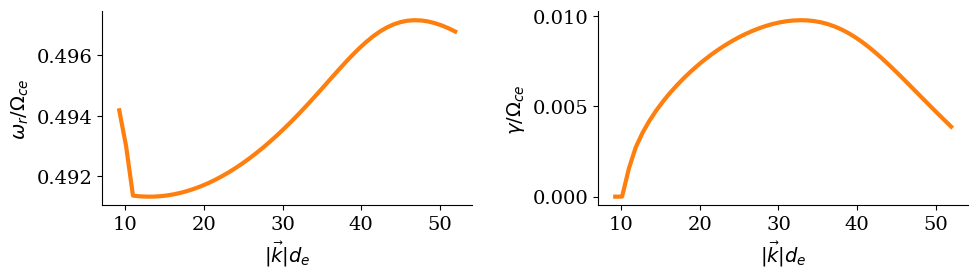

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
ax[0].plot(k_abs, sol_.real, linewidth=3, color="tab:orange")
ax[0].set_ylabel('$\omega_r/\Omega_{ce}$')
ax[0].set_xlabel(r"$|\vec{k}|d_{e}$")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(k_abs, sol_.imag, color="tab:orange", linewidth=3)
ax[1].set_ylabel('$\gamma/\Omega_{ce}$', rotation=90)
ax[1].set_xlabel(r"$|\vec{k}|d_{e}$")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

# QLT simulation

In [34]:
dE_init = E0 * np.ones(len(k_perp_))

m_star = -1
ic1 = omega_0 * 0.99 + 1e-3j
ic2 = omega_0 * 1 + 1e-5j

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K_perp_0], [K_par_0], [T_perp_0], [T_par_0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_perp_, k_par_, omega_pe, omega_pi, k_0, alpha_i, n_c, dk_par*dk_perp, omega_0, m_star, ic1, ic2, "oblique_gamma", False),
                                   atol=1e-6, rtol=1e-6, method='LSODA')

t =  0.0
max gamma =  0.00977297953405333
t =  0.5999999999995139
max gamma =  0.009772956766803492
t =  0.5999999999995139
max gamma =  0.009772956590832603
t =  1.1999999999990278
max gamma =  0.009772933644531374
t =  1.1999999999990278
max gamma =  0.00977293346703642
t =  38.97492259074916
max gamma =  0.009771122584045904
t =  38.97492259074916
max gamma =  0.009771027529942926
t =  76.7498451814993
max gamma =  0.009768110905220596
t =  76.7498451814993
max gamma =  0.00976783181602972
t =  114.52476777224942
max gamma =  0.009762817010856097
t =  114.52476777224942
max gamma =  0.009762293969972967
t =  148.6239324368248
max gamma =  0.009754444194118961
t =  148.6239324368248
max gamma =  0.009753678291905776
t =  182.72309710140016
max gamma =  0.009740322198667804
t =  182.72309710140016
max gamma =  0.009739017064813865
t =  216.82226176597553
max gamma =  0.0097159491794158
t =  216.82226176597553
max gamma =  0.009713593592133873
t =  249.79552717391354
max gamma =  0.009

In [35]:
len(result.t)

26

# Analyze results 

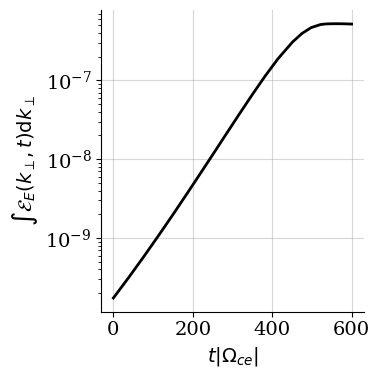

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(k_perp_[:, None] * result.y[6:, :] , axis=0)*dk_perp*dk_par/(8*np.pi)
ax.set_yscale("log")
ax.plot(result.t, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/oblique/perp_potential_energy.png", dpi=300, bbox_inches='tight')

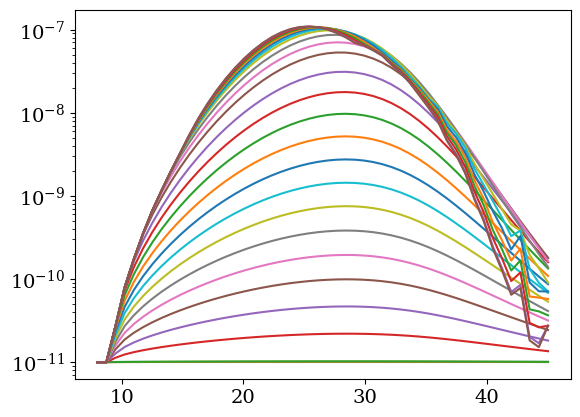

In [37]:
_ = plt.plot(k_perp_, result.y[6:,:])
plt.yscale("log")

Text(0.5, 1.0, '$\\mathcal{E}_{E}(|\\vec{k}|, t)$')

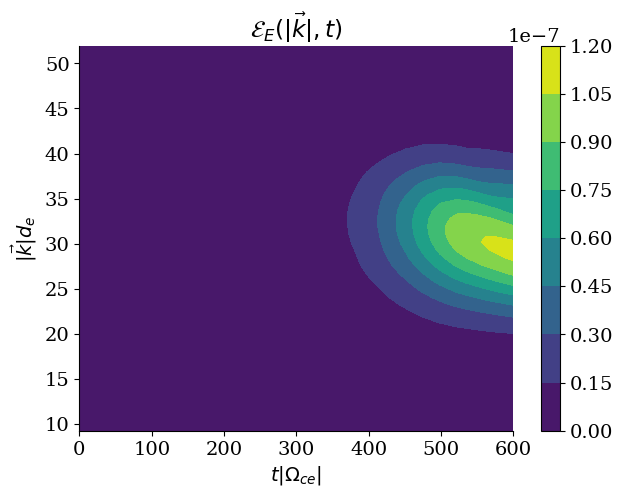

In [38]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.contourf(result.t, np.sqrt(k_perp_**2 + k_par_**2), result.y[6:], cmap="viridis")
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$|\vec{k}| d_{e}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}_{E}(|\vec{k}|, t)$")

In [39]:
1- result.y[4, -1]/result.y[4, 0]

0.7954567102353978

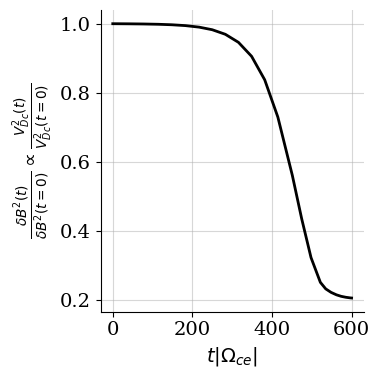

In [46]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[4, :]/result.y[4, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}^2(t)}{V_{Dc}^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/oblique/oblique_magnetic_energy.png", dpi=300, bbox_inches='tight')

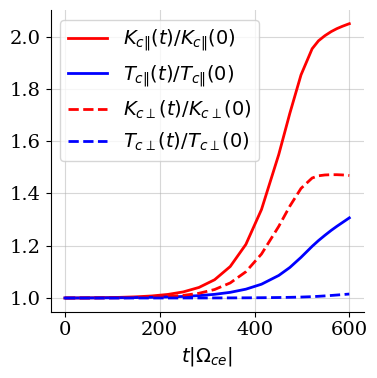

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="red", linewidth=2, label="$K_{c\|}(t)/K_{c\|}(0)$")
ax.plot(result.t, result.y[3, :]/result.y[3, 0], color="blue", linewidth=2, label="$T_{c\|}(t)/T_{c\|}(0)$")

ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="red", linewidth=2, ls="--", label="$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="blue", linewidth=2, ls="--", label="$T_{c\perp}(t)/T_{c\perp}(0)$")

ax.legend()
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/oblique/oblique_kinetic_energy_par.png", dpi=300, bbox_inches='tight')

In [52]:
result.y[3, -1]/result.y[3, 0]

1.306659265333317

# energy conservation 

In [48]:
# energy partition 
kinetic_energy = result.y[0, :] + 0.5 * result.y[1, :]
potential_energy = np.sum(k_perp_[:, None] * result.y[6:, :], axis=0)*dk_perp*dk_par / 8 / np.pi
magnetic_energy = result.y[4, :] /8 / np.pi * (  1 + (omega_0 / k_0 / (1 - omega_0))**2)
total_energy = kinetic_energy + magnetic_energy + potential_energy 

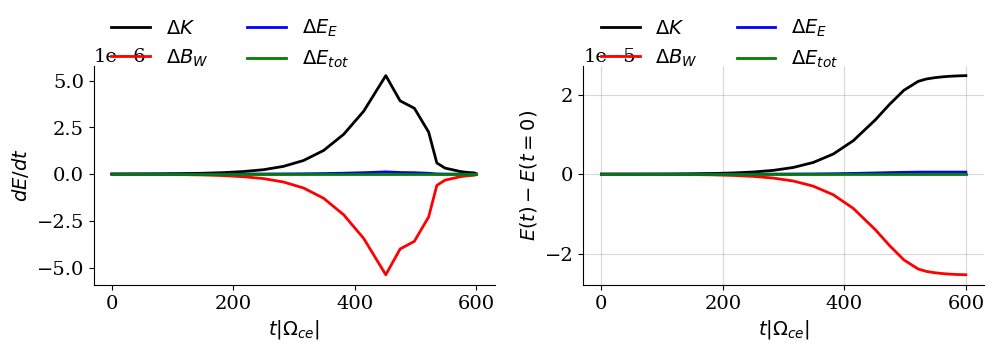

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

ax[0].plot(result.t[1:], kinetic_energy[1:] - kinetic_energy[:-1], color="black", linewidth=2, label="$\Delta K$")
ax[0].plot(result.t[1:], magnetic_energy[1:] - magnetic_energy[:-1], color="red", linewidth=2, label="$\Delta B_{W}$")
ax[0].plot(result.t[1:], potential_energy[1:] - potential_energy[:-1], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax[0].plot(result.t[1:], total_energy[1:] - total_energy[:-1], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax[0].set_xlabel(r'$t|\Omega_{ce}|$')
ax[0].set_ylabel(r'$dE/dt$')

legend = ax[0].legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax[1].plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W}$")
ax[1].plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax[1].plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax[1].set_xlabel(r'$t|\Omega_{ce}|$')
ax[1].set_ylabel(r'$E(t) - E(t=0)$')

legend = ax[1].legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


plt.grid(alpha=0.5) 
plt.tight_layout()


In [50]:
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/oblique_dB.npy", result.y[4, :])
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/oblique_T_perp.npy", result.y[2, :])
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/oblique_T_par.npy", result.y[3, :])

In [51]:
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/oblique_y.npy", result.y)
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/oblique_t.npy", result.t)